<a href="https://colab.research.google.com/github/tushwagh/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score
pd.set_option('display.max_columns',25)
warnings.filterwarnings('ignore')

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
dataset='/content/drive/MyDrive/Credit Card Default Pred/Copy of default of credit card clients.xls'

In [66]:
pip install --upgrade xlrd

In [67]:
df=pd.read_excel(dataset,header=1)

In [68]:
# First five row of data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [69]:
# Print Shape of data
print("The dimension of this Dataset is:", df.shape)

The dimension of this Dataset is: (30000, 25)


In [70]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

The default.payment.next.month column classifies each customer on whether they had defaulted their credit card payment in October 2005 ie 1 or not ie 0. This column would be used by the model to predict based on the remaining features in the dataset.

The Dataset and its attribute described below

**ID:** ID of each client

**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit

**SEX:** Gender (1=male, 2=female)

**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE:** Marital status (1=married, 2=single, 3=others)

**AGE:** Age in years

**PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay    for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)

**PAY_2:** Repayment status in August, 2005 (scale same as above)

**PAY_3:** Repayment status in July, 2005 (scale same as above)

**PAY_4:** Repayment status in June, 2005 (scale same as above)

**PAY_5**: Repayment status in May, 2005 (scale same as above)

**PAY_6:** Repayment status in April, 2005 (scale same as above)

**BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)

**BILL_AMT2:**Amount of bill statement in August, 2005 (NT dollar)

**BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)

**BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)

**BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)

**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)

**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)

**PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)

**PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)

**PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)

**PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)

**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)

**default.payment.next.month**: Default payment (1=yes, 0=no)


In [71]:
# checking the datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [72]:
df.isna().sum()    # check for missing values for surity

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Figure size 1800x720 with 0 Axes>

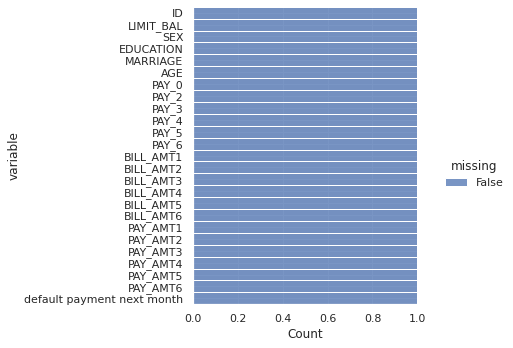

In [73]:
plt.figure(figsize=(25,10))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)


#plt.savefig("missing_data.png", dpi=100)
plt.show()

**OK, we don't have null values in any variable**

In [74]:
# Description Of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* The mean for our target variable is 0.221, which means that there are 22.1% of credit card that will default next month.

* The average value for the amount of credit card limit is 167,484.32 We have 
that the standard deviation is 129,747.6 (Is very Large).

* Regarding Eduaction level we have that the mean is 1.85 with standard deviation 0.79, so almost all the clients have university or graduate school in their education.

* The average age is 35.5 years, with a standard deviation of 9.2.









In [75]:
# Checking Categorical data
for kolom in ['SEX','EDUCATION','MARRIAGE'] :
    print(df[kolom].value_counts())
    print()

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



### **DATA CLEANING**

In [76]:
# After Removing ID column
df = df.drop(columns=['ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

**EDA**

An overview information of the dataset indicates that there is no null values. ‘ID’ column was removed from the dataset as this would not add any value to the analysis

In [77]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [78]:
df.rename(columns={"default payment next month":"default"},inplace=True)

In [79]:
df.groupby('default').count()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,,,,,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


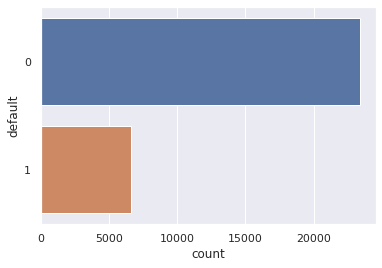

In [80]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="default", data=df)

figure = ax.get_figure()    
figure.savefig('default.png', dpi=400)


The figure above shows the breakdown between the default classes. Out of the 30,000 customers in the dataframe, 6,636 or 22% have shown to have defaulted at the end of the period. The default rate is relatively high and it may worth investigating the customer risk assessment in the approval process.

In [81]:
df.default.sum()

6636

In [82]:
print(df.default.sum()/len(df))

0.2212


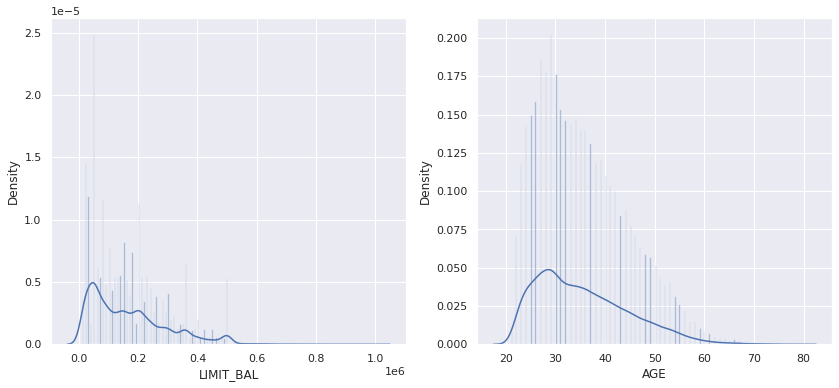

In [83]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL, kde=True, bins=220)

plt.subplot(122)
sns.distplot(df.AGE,kde=True,bins=220)

plt.show()

By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
We will observe the effect of variables on target variable below

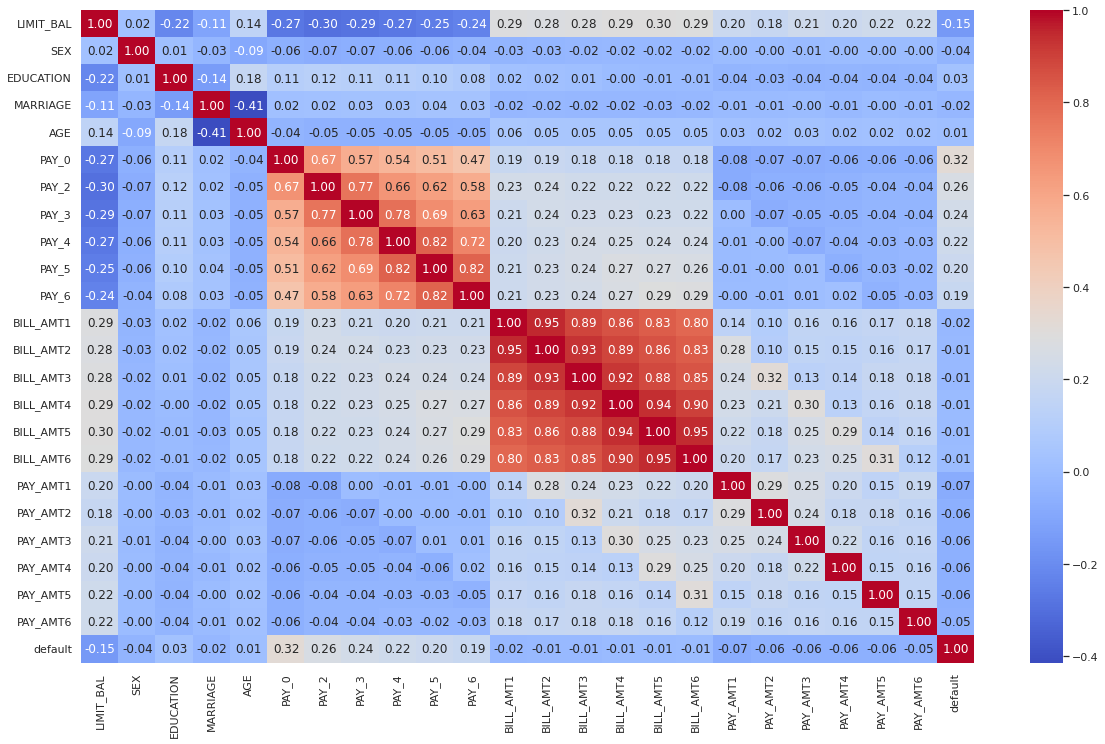

In [84]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',color='red',cmap='coolwarm')
plt.show()

We can demonstrate that no variables are strongly correlated with the Target variable (default). The ‘PAY_’ variables have a strong correlation between them and have a weak positive correlation with the target variable(default). All the ‘BILL_AMT’ variables have a good positive correlation between them. Also, ‘LIMIT_BAL’ has a good positive correlation with ‘BILL_AMT’ variables.

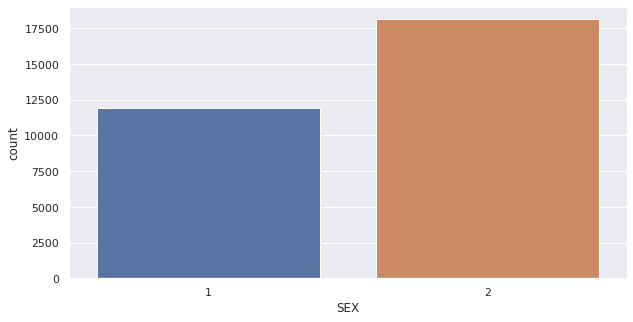

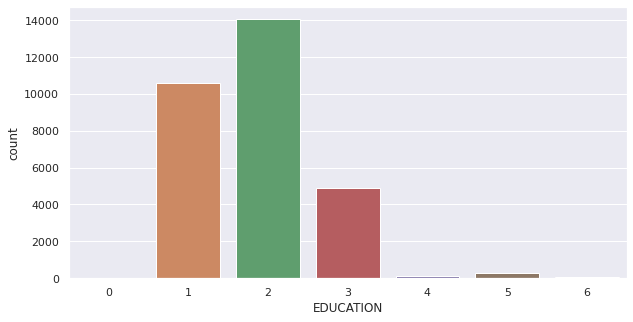

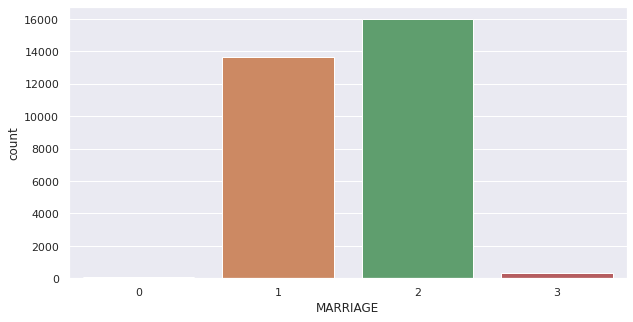

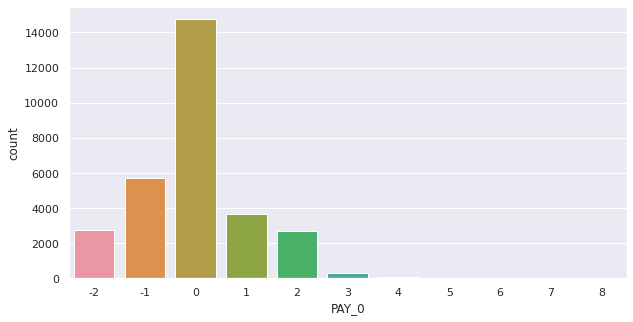

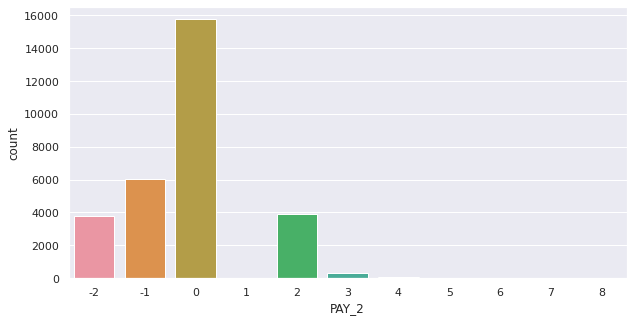

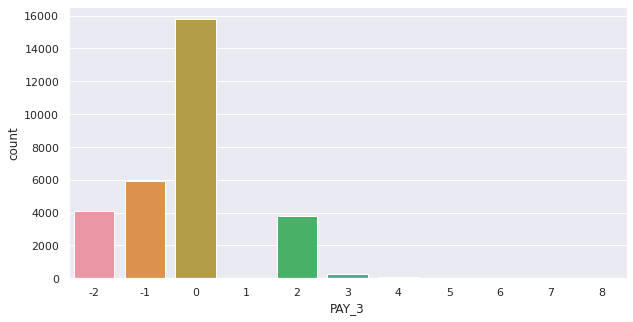

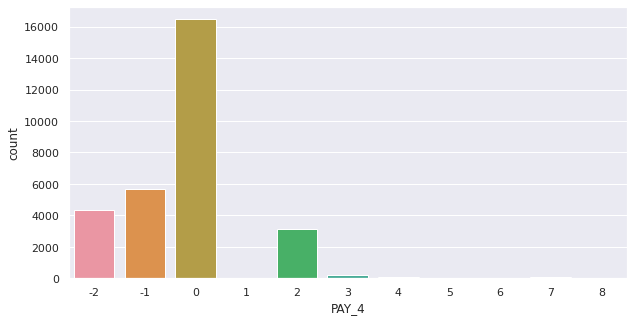

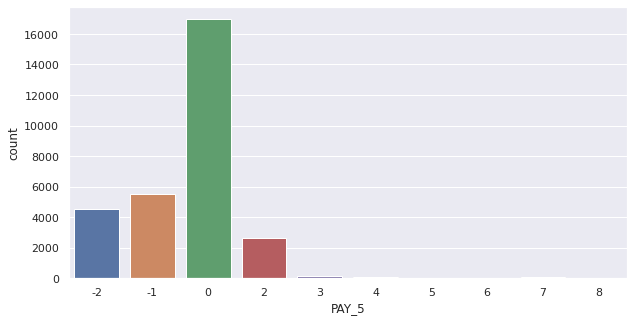

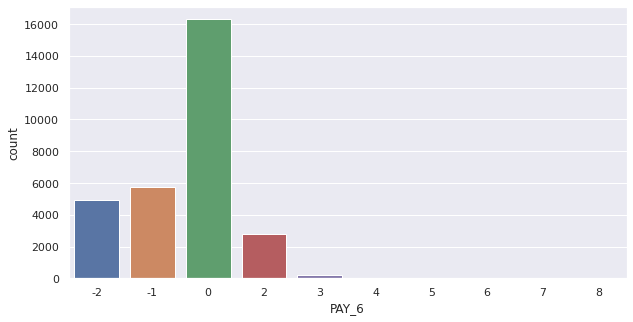

In [85]:
for i in [ 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.show()

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

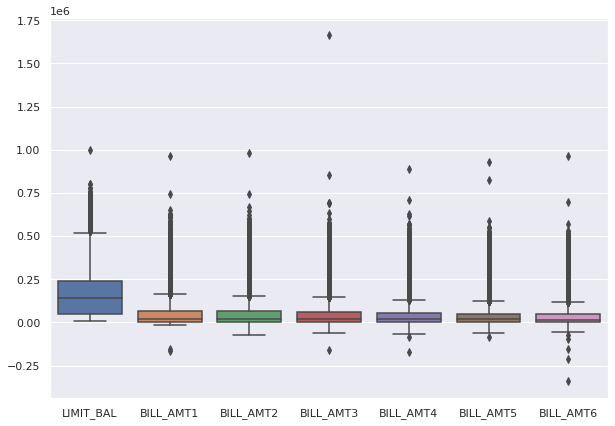

In [86]:
# Boxplot for Bill_Amt vs Limit_bal

plt.figure(figsize=(10,7))
sns.boxplot(data=df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.show()

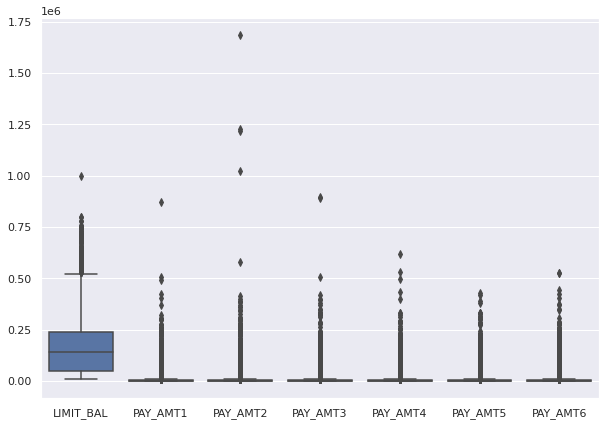

In [87]:
# Boxplot for Pay_Amt vs Limit_bal

plt.figure(figsize=(10,7))
sns.boxplot(data=df[['LIMIT_BAL','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
plt.show()

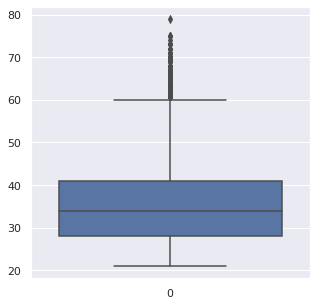

In [88]:
# Boxplot for column 'AGE'
plt.figure(figsize=(5,5))
sns.boxplot(data=df['AGE'])
plt.show()

In [89]:
# Outliers on numberical columns

num_var = df.select_dtypes(exclude='object')
for i in num_var:
    
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1
    UL = q3 + 1.5*IQR
    LL = q1 - 1.5*IQR

    print('IQR of',i,'= ',IQR)
    print('UL of',i,'= ',UL)
    print('LL of',i,'= ',LL)
    print('Number of Outliers in',i,' = ',(df.shape[0] - df[(df[i]<UL) & (df[i]>LL)].shape[0]))
    print(' ')

IQR of LIMIT_BAL =  190000.0
UL of LIMIT_BAL =  525000.0
LL of LIMIT_BAL =  -235000.0
Number of Outliers in LIMIT_BAL  =  167
 
IQR of SEX =  1.0
UL of SEX =  3.5
LL of SEX =  -0.5
Number of Outliers in SEX  =  0
 
IQR of EDUCATION =  1.0
UL of EDUCATION =  3.5
LL of EDUCATION =  -0.5
Number of Outliers in EDUCATION  =  454
 
IQR of MARRIAGE =  1.0
UL of MARRIAGE =  3.5
LL of MARRIAGE =  -0.5
Number of Outliers in MARRIAGE  =  0
 
IQR of AGE =  13.0
UL of AGE =  60.5
LL of AGE =  8.5
Number of Outliers in AGE  =  272
 
IQR of PAY_0 =  1.0
UL of PAY_0 =  1.5
LL of PAY_0 =  -2.5
Number of Outliers in PAY_0  =  3130
 
IQR of PAY_2 =  1.0
UL of PAY_2 =  1.5
LL of PAY_2 =  -2.5
Number of Outliers in PAY_2  =  4410
 
IQR of PAY_3 =  1.0
UL of PAY_3 =  1.5
LL of PAY_3 =  -2.5
Number of Outliers in PAY_3  =  4209
 
IQR of PAY_4 =  1.0
UL of PAY_4 =  1.5
LL of PAY_4 =  -2.5
Number of Outliers in PAY_4  =  3508
 
IQR of PAY_5 =  1.0
UL of PAY_5 =  1.5
LL of PAY_5 =  -2.5
Number of Outliers in PA

In [90]:
# Unique values in each categorical columns
display(sorted(df.SEX.unique()))
display(sorted(df.EDUCATION.unique()))
display(sorted(df.MARRIAGE.unique()))
display(sorted(df.PAY_0.unique()))

[1, 2]

[0, 1, 2, 3, 4, 5, 6]

[0, 1, 2, 3]

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

The EDUCATION column has 7 unique values, but as per our data description, we have only 4 unique values, so we are going to club categories 0, 5, and 6 with category 4

MARRIAGE column also has 4 unique values but according to our data we only have three categories

In [91]:
display(df.EDUCATION[df.EDUCATION == 0].count())
display(df[df.EDUCATION == 0].head())

display(df.MARRIAGE[df.MARRIAGE == 0].count())
display(df[df.MARRIAGE == 0].head())

display(df.PAY_0.value_counts(sort=False))
display(df[df.PAY_0 == -2].head())

14

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
3769,290000,2,0,2,38,1,-1,-1,-1,-1,-1,0,1437,3070,1406,2196,1481,1437,3078,1406,2196,1481,0,0
5945,270000,1,0,2,39,1,-1,-1,-1,-1,-2,0,10193,69553,18607,0,0,10193,70213,19008,399,0,0,0
6876,360000,1,0,2,30,0,0,-1,0,0,-1,40250,23022,12272,34345,36777,30,23000,12280,25007,25008,1767,3300,0
14631,350000,2,0,2,53,-1,-1,-1,-1,-1,-1,5095,4815,61044,22611,1385,6043,4840,61349,22687,1389,6058,1153,0
15107,210000,1,0,2,45,-2,-2,-2,-2,-2,-2,2563,5854,1032,788,3499,3372,5854,1032,788,3565,3372,15381,0


54

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
218,110000,2,3,0,31,0,0,0,0,0,0,89989,84229,79288,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,160000,2,2,0,37,0,0,0,0,0,0,2694,38433,38870,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,200000,2,3,0,51,-1,-1,-1,-1,0,-1,780,0,390,780,390,390,0,390,780,0,390,390,0
1019,180000,2,3,0,45,-1,-1,-2,-2,-2,-2,4148,0,0,0,0,0,0,0,0,0,0,0,0
1443,200000,1,3,0,51,-1,-1,-1,-1,0,-1,3556,4993,9212,2529,1036,4430,5020,9236,2529,0,4430,6398,0


 2     2667
-1     5686
 0    14737
-2     2759
 1     3688
 3      322
 4       76
 8       19
 7        9
 5       26
 6       11
Name: PAY_0, dtype: int64

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0
23,450000,2,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473,560,0,0,1128,1
33,500000,2,2,1,54,-2,-2,-2,-2,-2,-2,10929,4152,22722,7521,71439,8981,4152,22827,7521,71439,981,51582,0
34,500000,1,1,1,58,-2,-2,-2,-2,-2,-2,13709,5006,31130,3180,0,5293,5006,31178,3180,0,5293,768,0
45,210000,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [92]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.loc[(df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6), 'EDUCATION'] = 4

In [93]:
for i in df.loc[:, 'PAY_0':'PAY_6'].columns:
    df.loc[(df[i] == -2) | (df[i] == -1), i] = 0
    
df.rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

In [94]:
df.loc[df.SEX == 1, 'SEX'] = 0
df.loc[df.SEX == 2, 'SEX'] = 1

In [95]:
display(df.AGE.describe())

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [96]:
df = df.join(pd.Series(pd.qcut(df.AGE, 3, labels=[1, 2, 3]), name='age_category'))


In [97]:
sex_def = df.groupby(['SEX', 'default']).size().unstack()
edu_def = df.groupby(['EDUCATION', 'default']).size().unstack()
mar_def = df.groupby(['MARRIAGE', 'default']).size().unstack()
age_def = df.groupby(['age_category', 'default']).size().unstack()

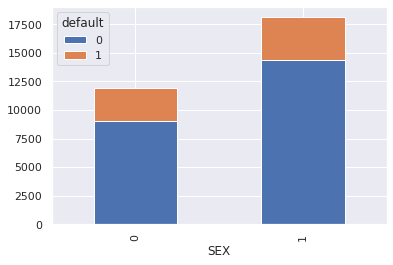

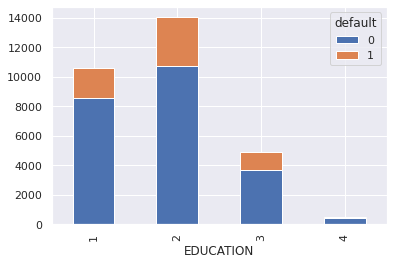

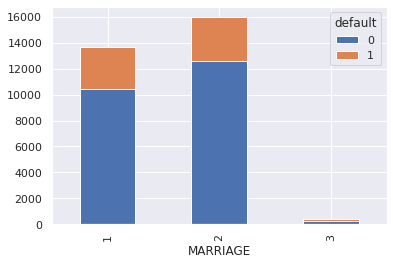

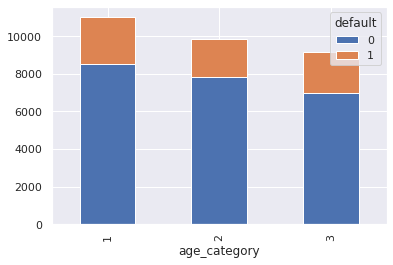

In [98]:
sex_def.plot(kind='bar', stacked=True)
edu_def.plot(kind='bar', stacked=True)
mar_def.plot(kind='bar', stacked=True)
age_def.plot(kind='bar', stacked=True)

##**Model Creation**

### **1. Logistic regression**

In [99]:

x= df.drop(['default'],1)
y = df['default']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [100]:
def res(y_test_valid,y_train_valid):
    cm_log = confusion_matrix(y_test,y_test_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(y_test,y_test_valid))
    print('train_accuracy:',accuracy_score(y_train,y_train_valid))
    print('test_accuracy:',accuracy_score(y_test,y_test_valid))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4663
           1       0.68      0.31      0.43      1337

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.81      0.79      6000

train_accuracy: 0.8184583333333333
test_accuracy: 0.814


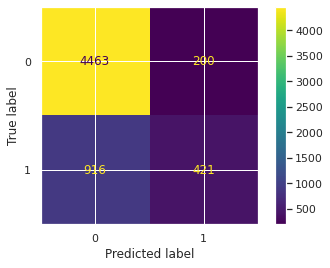

In [101]:
log_model= LogisticRegression()
log_model.fit(x_train,y_train)
y_pred_log = log_model.predict(x_test)
y_pred_train = log_model.predict(x_train)
res(y_pred_log,y_pred_train)

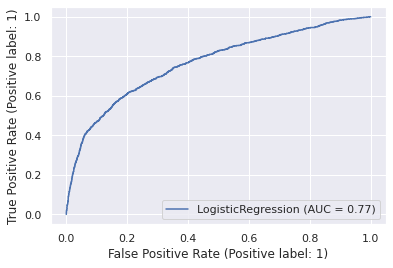

In [102]:
plot_roc_curve(log_model,x_test,y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4663
           1       0.64      0.41      0.50      1337

    accuracy                           0.82      6000
   macro avg       0.74      0.67      0.70      6000
weighted avg       0.80      0.82      0.80      6000

train_accuracy: 0.8172083333333333
test_accuracy: 0.8176666666666667


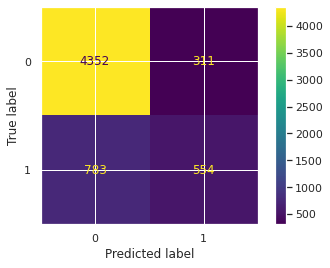

In [103]:
# log model using Threshold
threshold = 0.36
y_log_prob =  log_model.predict_proba(x_test)
y_train_log_prob = log_model.predict_proba(x_train)
y_log_prob=y_log_prob[:,1]
y_train_log_prob= y_train_log_prob[:,1]
y_pred_log_prob = np.where(y_log_prob>threshold,1,0)
y_pred_log_prob_train = np.where(y_train_log_prob>threshold,1,0)
res(y_pred_log_prob,y_pred_log_prob_train)

### **2.Decision Tree**

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4663
           1       0.38      0.40      0.39      1337

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.72      6000

train_accuracy: 0.9993333333333333
test_accuracy: 0.7211666666666666


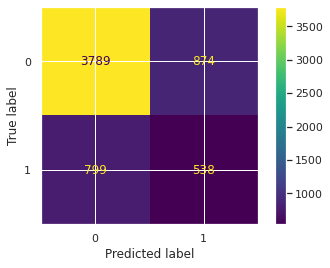

In [104]:
dec_model = DecisionTreeClassifier()
dec_model.fit(x_train,y_train)
y_pred_dec = dec_model.predict(x_test)
y_pred_dec_train = dec_model.predict(x_train)
res(y_pred_dec,y_pred_dec_train)

**Hyper parameter tuning for DecisionTree**

In [105]:
parameters = {'max_depth':[1,2,3,4,5,6],'min_samples_split':[3,4,5,6,7],'min_samples_leaf':[1,2,3,4,5,6]}
tree = GridSearchCV(dec_model, parameters,cv=10)
tree.fit(x_train,y_train)
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4663
           1       0.69      0.34      0.46      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

train_accuracy: 0.824
test_accuracy: 0.8191666666666667


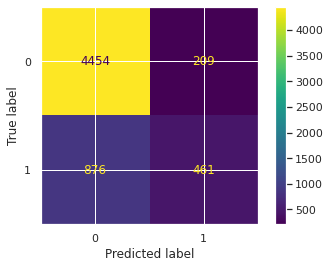

In [106]:
# We know that Decision tree will have high variance due to which the model overfit hence we can reduce this by "Pruning"
# By using the best parameter from GridSearchCV best parameters

dec_model1 = DecisionTreeClassifier(max_depth=4,min_samples_split=10,min_samples_leaf=1)
dec_model1.fit(x_train,y_train)
y_pred_dec1 = dec_model1.predict(x_test)
y_pred_dec_train1 = dec_model1.predict(x_train)
res(y_pred_dec1,y_pred_dec_train1)


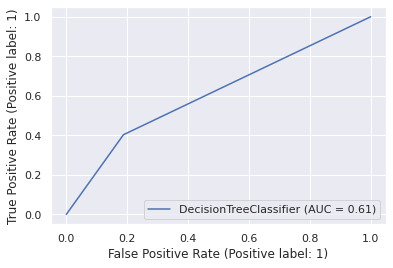

In [107]:
plot_roc_curve(dec_model,x_test,y_test)
plt.show()

### **Random Forest Model**

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4663
           1       0.65      0.34      0.45      1337

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

train_accuracy: 0.9992916666666667
test_accuracy: 0.8128333333333333


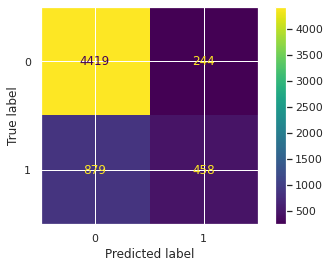

In [108]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_train = rf_model.predict(x_train)
res(y_pred_rf,y_pred_rf_train)

**Hyperparameter Tuning of Random forest**




In [109]:
# parameters = {'n_estimators':[60,70,80],'max_depth':[1,2,3,4,5,6],'min_samples_split':[3,4,5,6,7],
#               'min_samples_leaf':[1,2,3,4,5,6]}
# clf = GridSearchCV(rf_model, parameters,cv=10)
# clf.fit(x_train,y_train)
# clf.best_params_
    # {'max_depth': 5,
    #  'min_samples_leaf': 4,
    #  'min_samples_split': 3,
    #  'n_estimators': 70}

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4663
           1       0.69      0.31      0.43      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.63      0.66      6000
weighted avg       0.80      0.82      0.79      6000

train_accuracy: 0.8217083333333334
test_accuracy: 0.8151666666666667


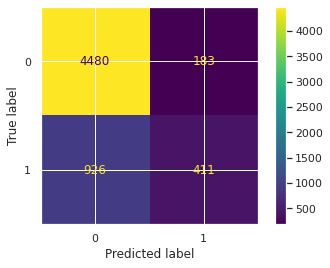

In [110]:
# Decision trees frequently perform well on imbalanced data. so using RandomForest uses bagging of n_trees will be a better idea.
rf_model = RandomForestClassifier(n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_train = rf_model.predict(x_train)
res(y_pred_rf,y_pred_rf_train)

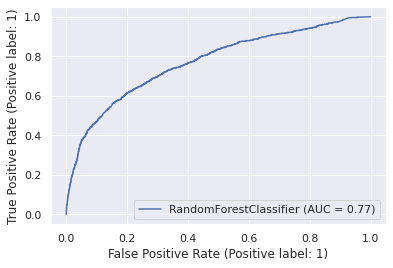

In [111]:
plot_roc_curve(rf_model,x_test,y_test)
plt.show()


### **4.Synthetic Minority Oversampling Technique (SMOTE)**


In [112]:
!pip install imblearn

In [113]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 23364, 1: 6636})
Resample dataset shape Counter({1: 23364, 0: 23364})


In [114]:
x_train,x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.20, random_state=1)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [115]:
x_train = pd.DataFrame(x_train).fillna(0)
x_test = pd.DataFrame(x_test).fillna(0)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4607
           1       0.80      0.67      0.73      4739

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.74      9346
weighted avg       0.75      0.75      0.74      9346

train_accuracy: 0.7589481568669413
test_accuracy: 0.7456665953349026


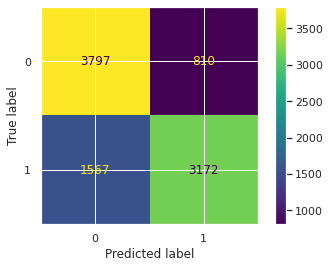

In [116]:
rf_model_smote = RandomForestClassifier(n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3,random_state=1)
rf_model_smote.fit(x_train,y_train)
y_pred_rf_smote = rf_model_smote.predict(x_test)
y_pred_rf_smote_train = rf_model_smote.predict(x_train)
res(y_pred_rf_smote,y_pred_rf_smote_train)

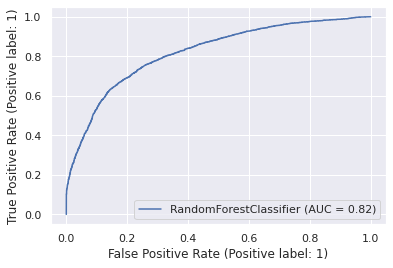

In [117]:
plot_roc_curve(rf_model_smote,x_test,y_test)
plt.show()

Finally using SMOTE we can see our accuracy as well as recall and precision ratio are give equal ratio
